In [7]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [2]:
def download_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

In [3]:
def prepare_data(data, time_steps):
    x, y = [], []
    for i in range(len(data) - time_steps):
        x.append(data[i:(i + time_steps)])
        y.append(data[i + time_steps])
    return np.array(x), np.array(y)

np.random.seed(42)

In [4]:
stock_symbol = "AAPL"
start_date = "2022-01-01"
end_date = "2024-01-01"
stock_data = download_stock_data(stock_symbol, start_date, end_date)

closing_prices = stock_data['Close'].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
closing_prices_scaled = scaler.fit_transform(closing_prices)

time_steps = 60

x, y = prepare_data(closing_prices_scaled, time_steps)

split_ratio = 0.8
train_size = int(len(x) * split_ratio)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

[*********************100%%**********************]  1 of 1 completed


In [5]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, epochs=100, batch_size=32)

predictions = model.predict(x_test)

predictions = scaler.inverse_transform(predictions)



Epoch 1/100

11/11 [==============================] - 6s 24ms/step - loss: 0.0526
Epoch 2/100
11/11 [==============================] - 0s 21ms/step - loss: 0.0186
Epoch 3/100
11/11 [==============================] - 0s 22ms/step - loss: 0.0121
Epoch 4/100
11/11 [==============================] - 0s 22ms/step - loss: 0.0103
Epoch 5/100
11/11 [==============================] - 0s 22ms/step - loss: 0.0090
Epoch 6/100
11/11 [==============================] - 0s 22ms/step - loss: 0.0085
Epoch 7/100
11/11 [==============================] - 0s 22ms/step - loss: 0.0078
Epoch 8/100
11/11 [==============================] - 0s 22ms/step - loss: 0.0072
Epoch 9/100
11/11 [==============================] - 0s 22ms/step - loss: 0.0066
Epoch 10/100
11/11 [==============================] - 0s 25ms/step - loss: 0.0059
Epoch 11/100
11/11 [==============================] - 0s 22ms/step - loss: 0.0055
Epoch 12/100
11/11 [==============================] - 0s 23ms/step - loss: 0.0051
Epoch 13/100
11/11 [==

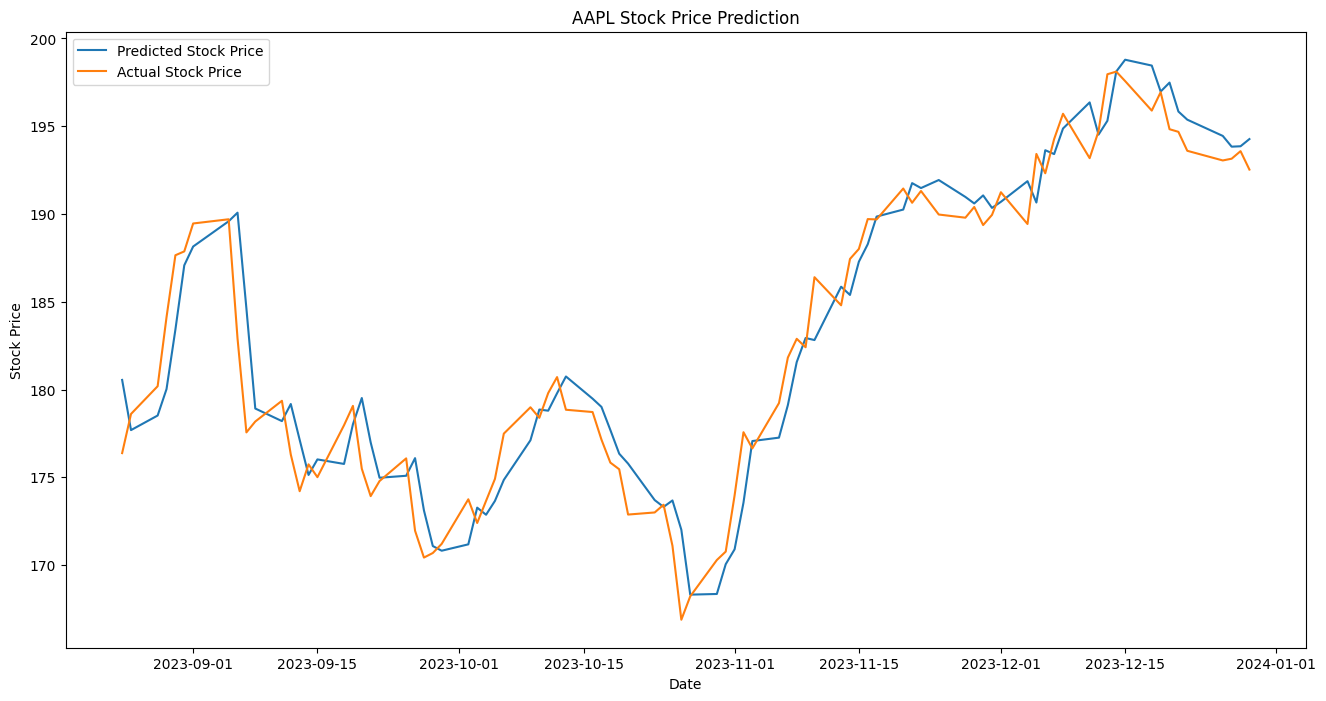

In [6]:
plt.figure(figsize=(16, 8))
plt.plot(stock_data.index[-len(predictions):], predictions, label='Predicted Stock Price')
plt.plot(stock_data.index[-len(predictions):], scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual Stock Price')
plt.title(f'{stock_symbol} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()